In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import ( accuracy_score , precision_score ,
recall_score , f1_score , confusion_matrix ,
roc_auc_score , roc_curve , classification_report )

df = sns.load_dataset('titanic')

In [3]:
print(df.shape)
print(df.head())
print(df.describe())
print(df.info())

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008

In [4]:
for col in df.columns:
    print(col, ":", df[col].isna().sum())

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [5]:
columns_names = df.columns
columns_names
for name in columns_names:
    print(name,"\n", df[name].unique())

survived 
 [0 1]
pclass 
 [3 1 2]
sex 
 ['male' 'female']
age 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp 
 [1 0 3 4 2 5 8]
parch 
 [0 1 2 5 3 4 6]
fare 
 [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8


In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
columns_names = df.columns

In [8]:
print(f"Ogółem przeżyło: {df['survived'].mean():.1%}")
print(f"\nWedług płci:")
print(df.groupby('sex')['survived'].mean())
print(f"\nWedług klasy:")
print(df.groupby('class')['survived'].mean())

Ogółem przeżyło: 38.4%

Według płci:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Według klasy:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


/tmp/ipython-input-1511726226.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('class')['survived'].mean())


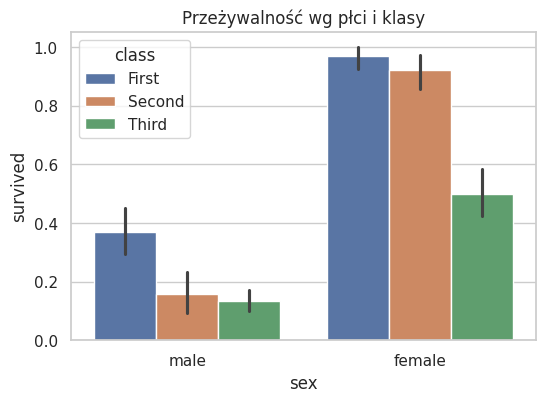

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", hue="class", data=df)
plt.title("Przeżywalność wg płci i klasy")
plt.show()




In [10]:
null_values = ['nan', "NaN"]
df.replace(null_values, np.nan, inplace=True)

for name in columns_names:
  nan_sum = df[name].isna().sum()
  print(name, nan_sum)
  if(nan_sum / df.shape[0] > 0.5):
    df.drop(name, axis=1, inplace=True)
    print(f"Dropped {name}")
df['age'].fillna(int(df['age'].mean()), inplace=True)
df = df.dropna()

df.drop('alive', axis=1, inplace=True)
df.drop('adult_male', axis=1, inplace=True)
df.drop('who', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['sex','embarked', 'embark_town', 'class',
                                 'alone','pclass'], drop_first=True)

survived 0
pclass 0
sex 0
age 177
sibsp 0
parch 0
fare 0
embarked 2
class 0
who 0
adult_male 0
deck 688
Dropped deck
embark_town 2
alive 0
alone 0


/tmp/ipython-input-2624174795.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(int(df['age'].mean()), inplace=True)
/tmp/ipython-input-2624174795.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('alive', axis=1, inplace=True)
/tmp/ipython-input-2624174795.py:14: SettingWithCopyWarning: 
A value is trying to be 

In [11]:
y = df['survived']
df.drop('survived', axis=1, inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=7, stratify=y)

In [12]:
model = LogisticRegression(max_iter =1000 , random_state =42).fit(X_train, y_train)
for nazwa , beta in zip( X. columns , model . coef_ [0]) :
  odds_ratio = np.exp ( beta )
  print (f"{ nazwa }: beta ={ beta :.3f} , odds ratio ={ odds_ratio :.3f}")

age: beta =-0.039 , odds ratio =0.961
sibsp: beta =-0.462 , odds ratio =0.630
parch: beta =-0.180 , odds ratio =0.835
fare: beta =0.002 , odds ratio =1.002
sex_male: beta =-2.564 , odds ratio =0.077
embarked_Q: beta =0.150 , odds ratio =1.162
embarked_S: beta =-0.171 , odds ratio =0.843
embark_town_Queenstown: beta =0.150 , odds ratio =1.162
embark_town_Southampton: beta =-0.171 , odds ratio =0.843
class_Second: beta =-0.409 , odds ratio =0.664
class_Third: beta =-0.993 , odds ratio =0.370
alone_True: beta =-0.581 , odds ratio =0.560
pclass_2: beta =-0.409 , odds ratio =0.664
pclass_3: beta =-0.993 , odds ratio =0.370


Accuracy : 0.7808988764044944
Precision : 0.7457627118644068
Recall : 0.6470588235294118
F1: 0.6929133858267716
AUC : 0.8356951871657754

Confusion matrix:
 [[95 15]
 [24 44]]


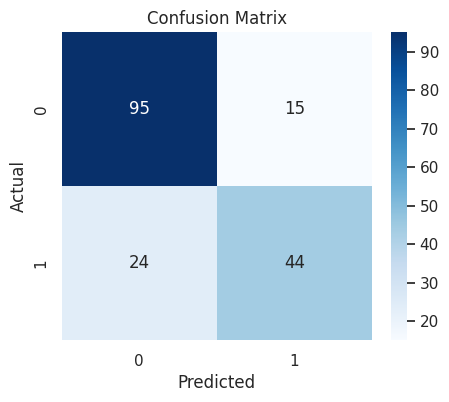

In [13]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
def print_metrics(y_test, y_pred, y_prob):
  print ("Accuracy :", accuracy_score ( y_test , y_pred ))
  print ("Precision :", precision_score ( y_test , y_pred ))
  print ("Recall :", recall_score ( y_test , y_pred ))
  print ("F1:", f1_score ( y_test , y_pred ))
  print ("AUC :", roc_auc_score ( y_test , y_prob ))
print_metrics ( y_test , y_pred , y_prob )

print("\nConfusion matrix:\n", confusion_matrix(y_test,y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

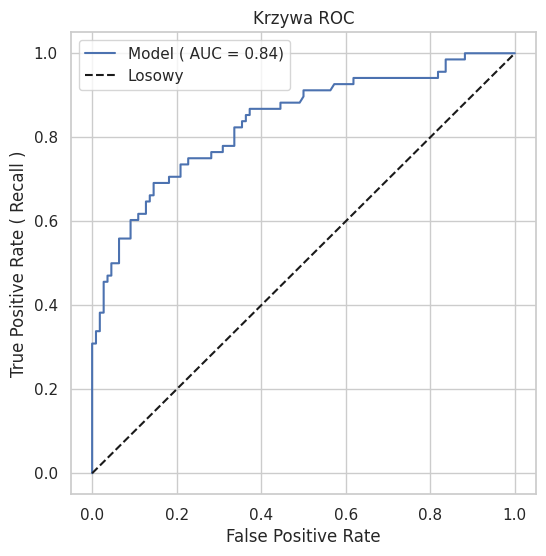

In [14]:

from sklearn.metrics import roc_curve , roc_auc_score
# Oblicz krzywa ROC
fpr , tpr , thresholds = roc_curve ( y_test , y_prob )
auc = roc_auc_score ( y_test , y_prob )
# Narysuj
plt.figure ( figsize =(6 , 6) )
plt.plot (fpr , tpr , label =f'Model ( AUC = { auc :.2f})')
plt.plot ([0 , 1] , [0 , 1] , 'k--', label ='Losowy')
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate ( Recall )')
plt.title ('Krzywa ROC')
plt.legend ()
plt.show ()


In [15]:
thresholds = [0.3,0.4,0.5,0.6,0.7]
for t in thresholds:
    pred = (y_prob >= t).astype(int)
    print(f"\nThreshold={t}")
    print_metrics(y_test, pred, y_prob)


Threshold=0.3
Accuracy : 0.7303370786516854
Precision : 0.6219512195121951
Recall : 0.75
F1: 0.68
AUC : 0.8356951871657754

Threshold=0.4
Accuracy : 0.7584269662921348
Precision : 0.676056338028169
Recall : 0.7058823529411765
F1: 0.6906474820143885
AUC : 0.8356951871657754

Threshold=0.5
Accuracy : 0.7808988764044944
Precision : 0.7457627118644068
Recall : 0.6470588235294118
F1: 0.6929133858267716
AUC : 0.8356951871657754

Threshold=0.6
Accuracy : 0.7808988764044944
Precision : 0.7959183673469388
Recall : 0.5735294117647058
F1: 0.6666666666666666
AUC : 0.8356951871657754

Threshold=0.7
Accuracy : 0.7752808988764045
Precision : 0.85
Recall : 0.5
F1: 0.6296296296296297
AUC : 0.8356951871657754


In [16]:
model_bal = LogisticRegression(max_iter=2000, class_weight="balanced").fit(X_train,y_train)
pred_bal = model_bal.predict(X_test)
prob_bal = model_bal.predict_proba(X_test)[:,1]

print("\nModel balanced")
print("Recall:", recall_score(y_test,pred_bal))
print("Precision:", precision_score(y_test,pred_bal))
print("AUC:", roc_auc_score(y_test,prob_bal))


Model balanced
Recall: 0.7205882352941176
Precision: 0.6805555555555556
AUC: 0.8356951871657754


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

C_values = [0.001,0.01,0.1,1,10,100]
auc_list = []
coef_sums = []

for C in C_values:
    m = LogisticRegression(max_iter=2000, C=C).fit(X_train_s,y_train)
    auc = roc_auc_score(y_test, m.predict_proba(X_test_s)[:,1])
    auc_list.append(auc)
    coef_sums.append(np.sum(np.abs(m.coef_)))


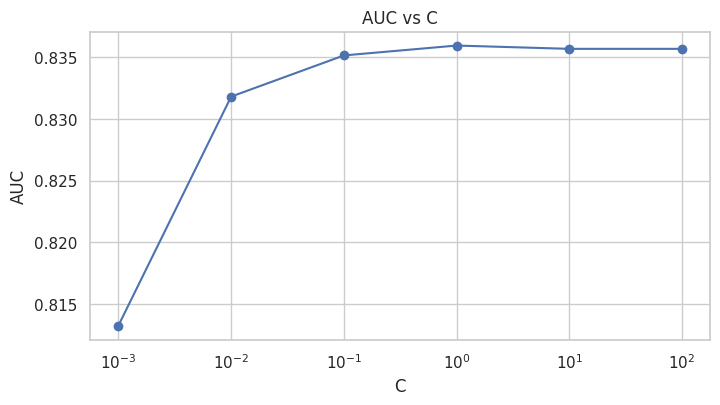

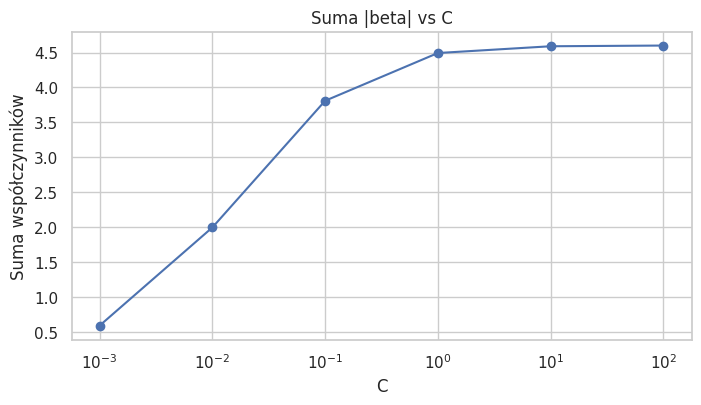

In [18]:
plt.figure(figsize=(8,4))
plt.plot(C_values, auc_list, marker='o')
plt.xscale("log")
plt.title("AUC vs C")
plt.ylabel("AUC")
plt.xlabel("C")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(C_values, coef_sums, marker='o')
plt.xscale("log")
plt.title("Suma |beta| vs C")
plt.ylabel("Suma współczynników")
plt.xlabel("C")
plt.show()

In [19]:
m_l2 = LogisticRegression(max_iter=2000, C=0.1, penalty="l2").fit(X_train_s,y_train)
m_l1 = LogisticRegression(max_iter=2000, C=0.1, penalty="l1", solver="liblinear").fit(X_train_s,y_train)

print("\nPorównanie L1 vs L2")
print("L2 współczynniki:\n", m_l2.coef_)
print("L1 współczynniki:\n", m_l1.coef_)


Porównanie L1 vs L2
L2 współczynniki:
 [[-0.43258109 -0.3836875  -0.11412921  0.09377305 -1.14609271  0.0383125
  -0.08515153  0.0383125  -0.08515153 -0.13566537 -0.44698178 -0.22666159
  -0.13566537 -0.44698178]]
L1 współczynniki:
 [[-3.06017455e-01 -1.76162764e-01  0.00000000e+00  8.34718577e-02
  -1.14161118e+00  0.00000000e+00 -1.71943368e-01  0.00000000e+00
  -5.41460766e-05 -1.12853382e-01 -6.94276386e-01  0.00000000e+00
  -2.78394558e-03 -2.92985912e-02]]


In [33]:
#Cz. 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

depths = [2, 3, 5, 7, 10, None]
scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    scores.append({
        "model": model,
        "depth": depth,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

df_scores = pd.DataFrame(scores)
print(df_scores)

best_score = df_scores.iloc[np.argmax(df_scores["f1"])]
print("\nNajlepszy model:")
print(best_score)

                                               model  depth  accuracy  \
0  DecisionTreeClassifier(max_depth=2, random_sta...    2.0  0.758427   
1  DecisionTreeClassifier(max_depth=3, random_sta...    3.0  0.775281   
2  DecisionTreeClassifier(max_depth=5, random_sta...    5.0  0.775281   
3  DecisionTreeClassifier(max_depth=7, random_sta...    7.0  0.797753   
4  DecisionTreeClassifier(max_depth=10, random_st...   10.0  0.792135   
5            DecisionTreeClassifier(random_state=42)    NaN  0.797753   

   precision    recall        f1  
0   0.686567  0.676471  0.681481  
1   0.818182  0.529412  0.642857  
2   0.780000  0.573529  0.661017  
3   0.796296  0.632353  0.704918  
4   0.746032  0.691176  0.717557  
5   0.735294  0.735294  0.735294  

Najlepszy model:
model        DecisionTreeClassifier(random_state=42)
depth                                            NaN
accuracy                                    0.797753
precision                                   0.735294
recall       

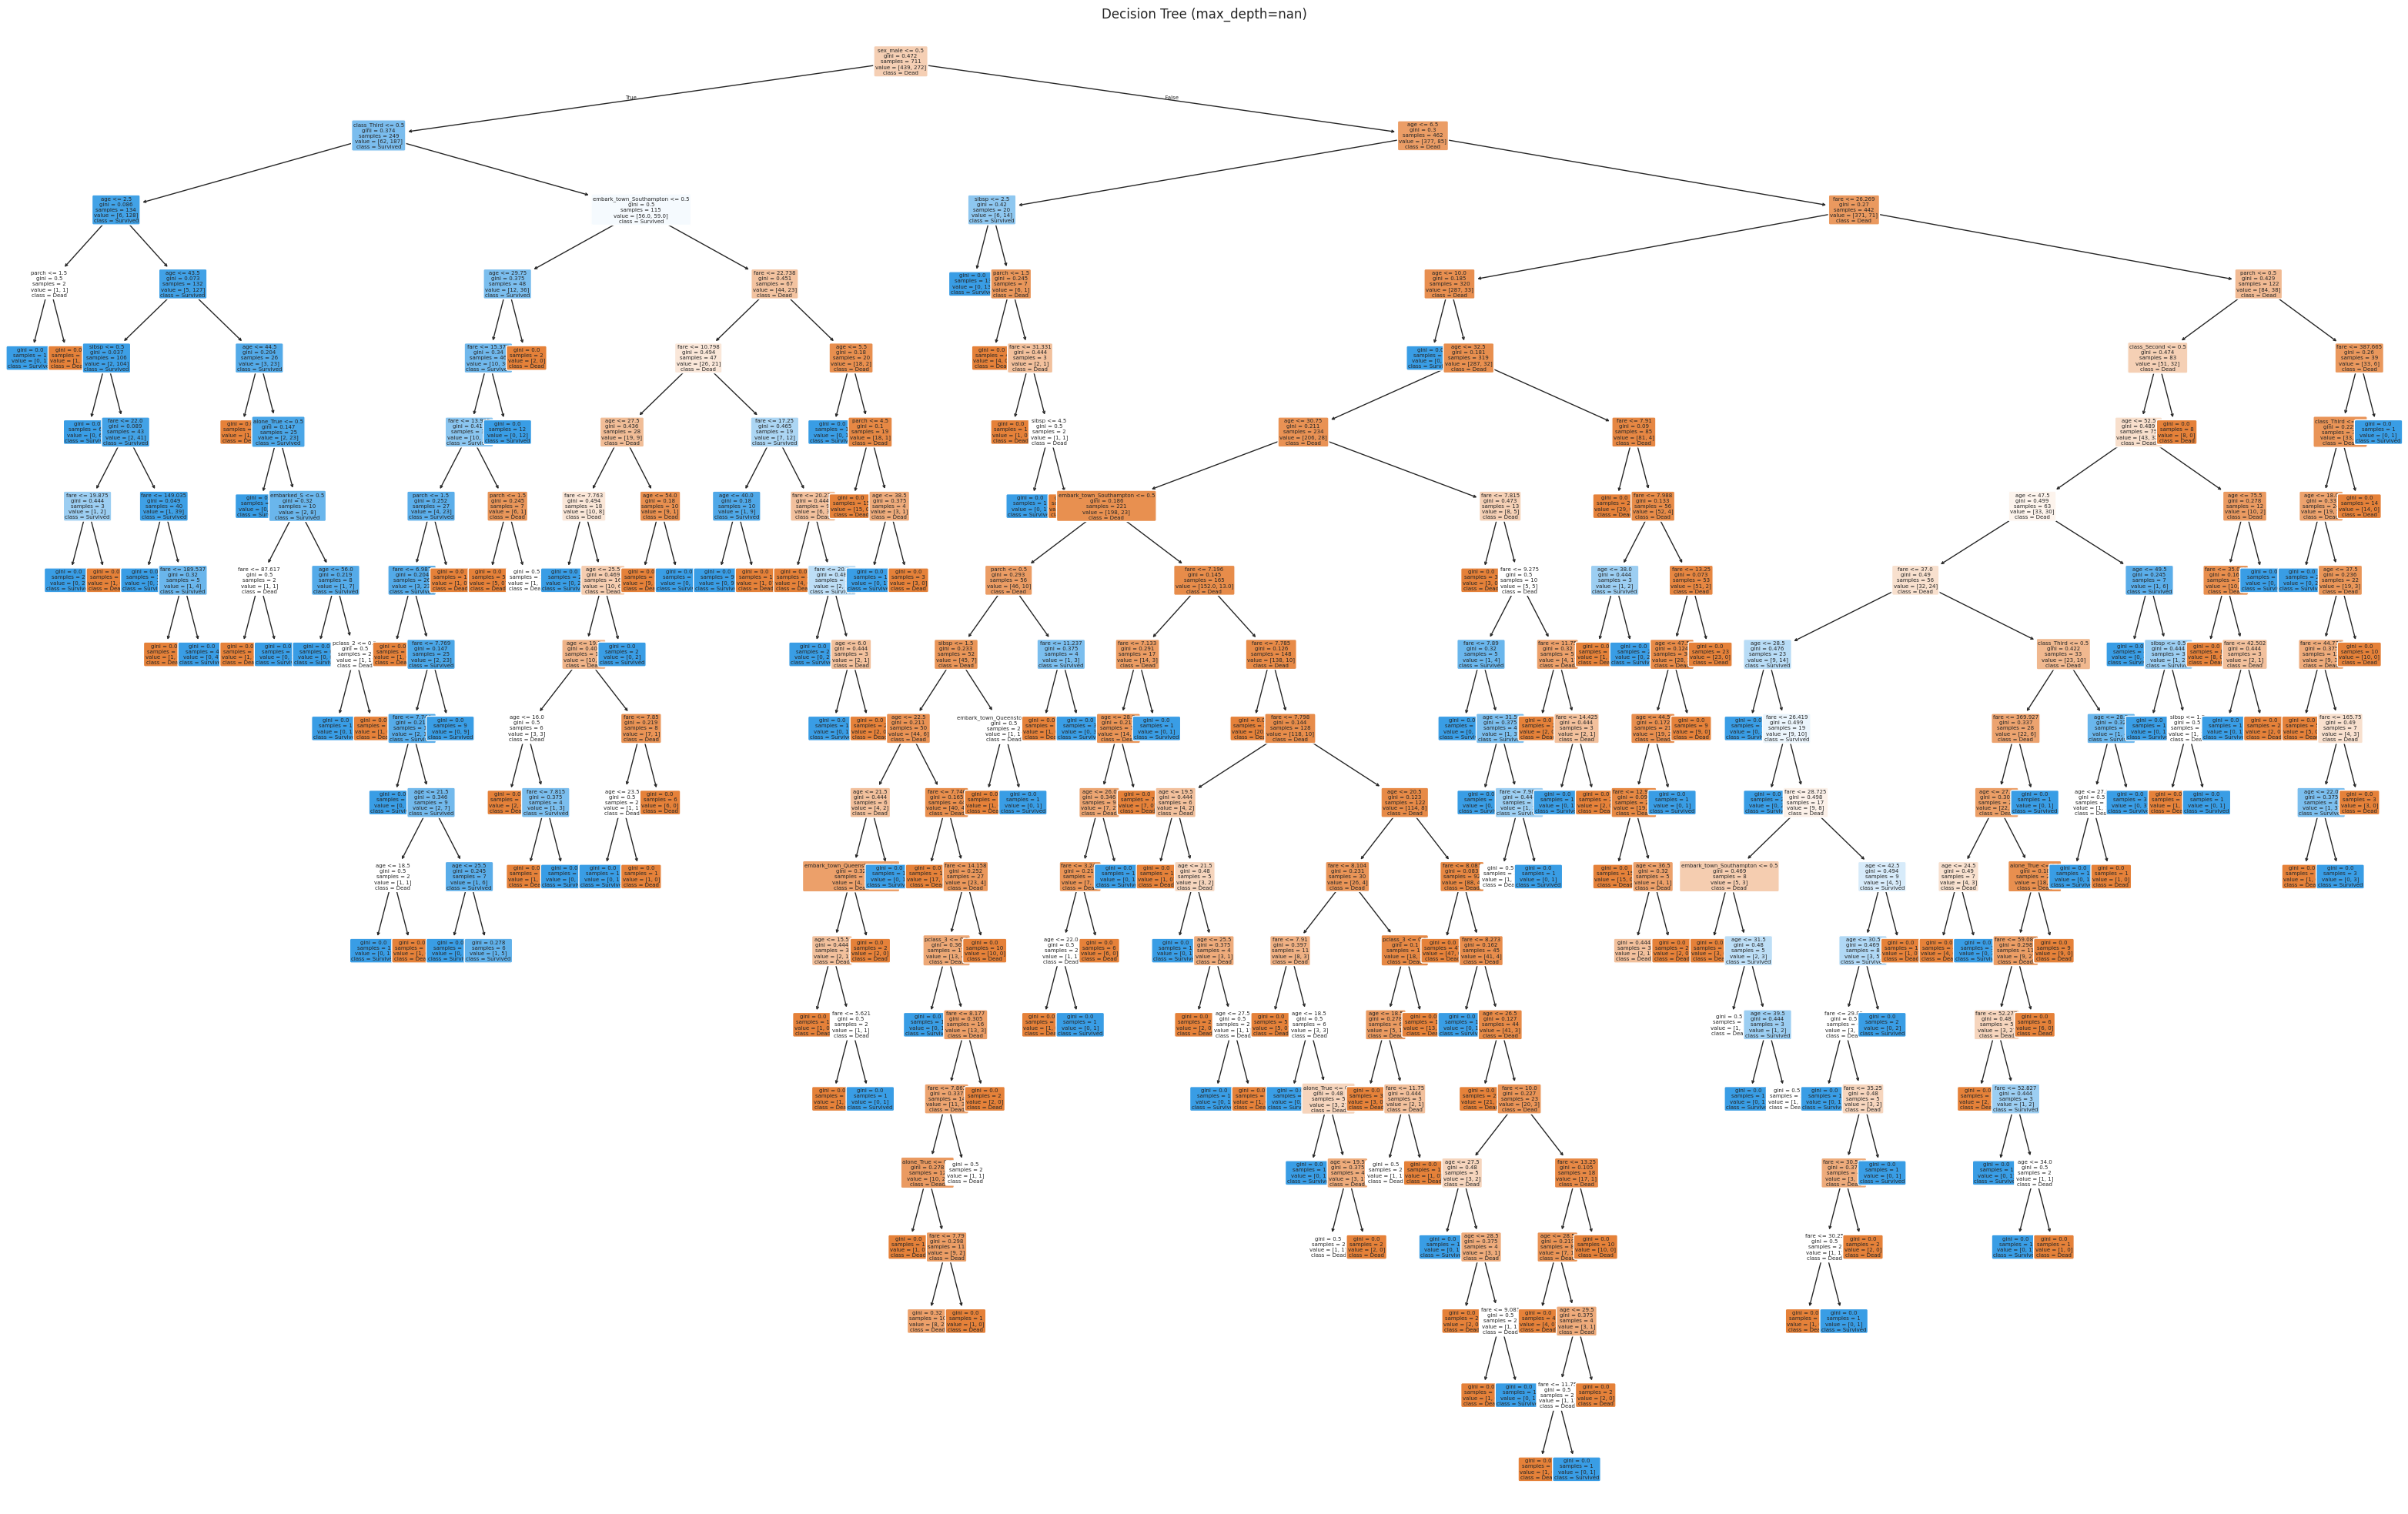

In [34]:
plt.figure(figsize=(40, 25))
plot_tree(best_score["model"],
          feature_names=X.columns,
          class_names=["Dead", "Survived"],
          filled=True,
          rounded=True,
          fontsize=5)
plt.title(f"Decision Tree (max_depth={best_score["depth"]})")
plt.show()

In [41]:
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train_scaled[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

k_values = [1, 3, 5, 7, 9, 11, 15]
scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    scores.append({
        "model": model,
        "k": k,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

df_scores = pd.DataFrame(scores)

print(df_scores)

                                  model   k  accuracy  precision    recall  \
0   KNeighborsClassifier(n_neighbors=1)   1  0.724719   0.646154  0.617647   
1   KNeighborsClassifier(n_neighbors=3)   3  0.724719   0.661017  0.573529   
2                KNeighborsClassifier()   5  0.713483   0.644068  0.558824   
3   KNeighborsClassifier(n_neighbors=7)   7  0.730337   0.672414  0.573529   
4   KNeighborsClassifier(n_neighbors=9)   9  0.752809   0.730769  0.558824   
5  KNeighborsClassifier(n_neighbors=11)  11  0.752809   0.722222  0.573529   
6  KNeighborsClassifier(n_neighbors=15)  15  0.752809   0.714286  0.588235   

         f1  
0  0.631579  
1  0.614173  
2  0.598425  
3  0.619048  
4  0.633333  
5  0.639344  
6  0.645161  


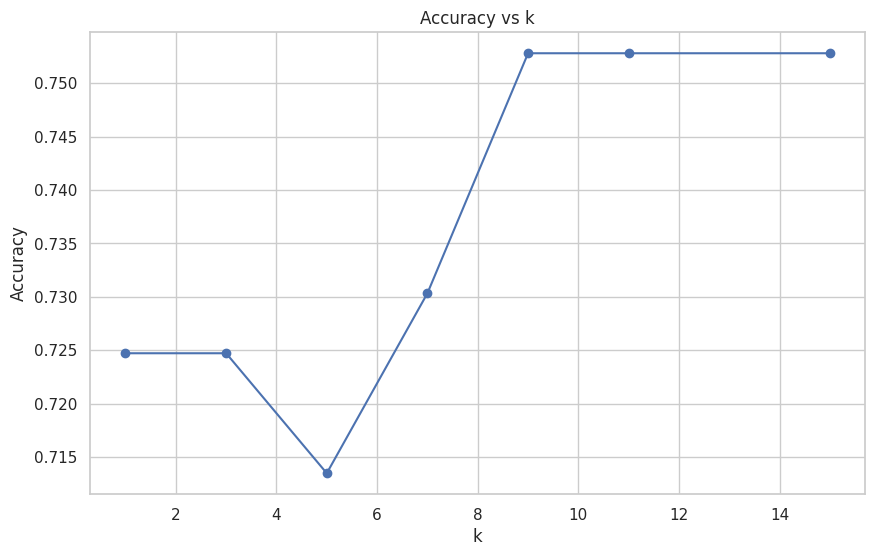

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df_scores["k"], df_scores["accuracy"], marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.grid(True)
plt.show()

In [43]:
best_score = df_scores.iloc[np.argmax(df_scores["f1"])]
print(best_score)

model        KNeighborsClassifier(n_neighbors=15)
k                                              15
accuracy                                 0.752809
precision                                0.714286
recall                                   0.588235
f1                                       0.645161
Name: 6, dtype: object
